# K-Means clustering

Clustering algorithms such as K-Means are unsupervised, so they are trained on features/attributes only.
The goal is to summarise and find patterns or an underlying structure by organising data into similarity groups (clusters).

# Install and packages

In [1]:
import os
os.chdir('/Users/loucap/Documents/GitWork/ML_Workshop/')

In [2]:
# Import necessary packages...


import pandas as pd
# includes useful functions for manipulating data 

import numpy as np
# includes useful functions for performing mathematical operations

import matplotlib.pyplot as plt
import seaborn as sns
# used for creating visualisations and graphs

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# sklearn stands for scikit-learn - a machine learning library: used to build machine learning models

from kneed import KneeLocator
# kneed is a package that includes functions to help identify the knee/elbow point 

# Load up the Iris dataset

iris = pd.read_csv("Data/iris.csv")

# Exploring the data

As previously mentioned, clustering algorithms do not require labelled data. But, you'll notice we have a column 'variety' with our target attribute. This can be ignored, as we won't be feeding this target attribute to the algorithm. 

In [3]:
iris.head()
# allows us to view the first 5 rows of a dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


First, let's separate our features from the target attribute. 

In [4]:
x = iris.iloc[:, [0,1,2,3]].values
# iloc helps us select specific rows or columns from a dataset
# values returns a NumPy representation of a dataframe - with the axes labels removed
# values are stored in a 2D array

In [5]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.info()
# gives us a concise summary of the dataframe 
# number of columns, missing data count, data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()
# tells us about the statistical variation in our data

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Standardise feature data

## Why bother?

When it comes to performing clustering on a given dataset, you must think carefully about your feature variables. 

Perhaps your dataset contains information on bank loans and customer data. It could contain a variable 'annual income' which ranges from £19,000 - £1,000,000, and another variable 'monthly debt' which ranges from £0 - £400,000. Therefore, we must change the values of these numeric columns in the dataset to ensure that they use a common scale, i.e., we standardise/normalise the data. In machine learning, this is referred to as 'feature scaling', and is especially important for clustering given that it is a distance-based algorithm.

Because k-means uses the Euclidean distance to calculate the distance between data points and the centroids, we need to ensure that the distance measure accords equal weight to each variable. We don't want to put more weight on variables that might have higher variance. 


To do this, we will use scikit-learn's preprocessing package which comes with a StandardScaler() class, which is a quick way to perform feature scaling.


In [8]:
ss = StandardScaler()

x = ss.fit_transform(x)

x = pd.DataFrame(x, columns = iris.columns[:-1])
# makes the output easier to read than a big array

x
# prints dataframe


,sepal.length,sepal.width,petal.length,petal.width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [9]:
x.describe()
# tells us about the statistical variation - we can see how it's changed after standardisation 
# check the mean and std of each feature
# can see mean is very close to 0 and std very close to 1

,sepal.length,sepal.width,petal.length,petal.width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [10]:
# Let's look at the frequency distribution of species
iris.variety.value_counts()

Setosa        50
Virginica     50
Versicolor    50
Name: variety, dtype: int64

# Let's give clustering a go!

Of course, we already know that the optimum number of clusters for classification is going to be 3 (given we have 3 species), but for now, let's pretend that we don't know this and randomly set k = 5.

To cluster our data we an use the KMeans class which comes with the scikit-learn package. It has the following parameters:

* init - this is the method for initialisation. The standard version of the k-means algorithm is implemented by setting init to "random".
* n_clusters - this is the number of clusters that you want the algorithm to form, as well as the number of centroids to generate
* n_iter - this refers to the number of iterations, i.e., the number of times that the k-means algorithm will be run. This is important because 2 runs can converge on different cluster assignments. The default behaviour for the scikit-learn algorithm is to perform ten k-means runs and then return the results of the one with the lowest sum of the squared error (SSE).
* max_iter - this refers to the max number of iterations of the algorithm for a single run

## Create instance of KMeans class

In [11]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init = 10,
    max_iter=300,
    random_state=32
)

## Fit K-Means with our features

The fit function below comprises the training part of the modelling process. We fit our k-means estimator with our scaled_features. The code below will perform 10 runs of the k-means algorithm on the data, with a maximum of 300 iterations per run - as specified when we created the instance of KMeans class.

In [12]:
kmeans.fit(x)

KMeans(init='random', n_clusters=5, random_state=32)

## Access lowest SSE value from the 10 initialisations

In [13]:
kmeans.inertia_

# The lowest SSE value is also referred to as the 'inertia'

91.55536235350218

In [14]:
kmeans.cluster_centers_

# We can also access the final locations of the centroids
# I.e., these are the coordinates of the cluster centers

array([[-0.57445998,  1.95749886, -1.27027277, -1.20406322],
       [-0.42151732, -1.42945216,  0.03937284, -0.05297198],
       [ 0.35704132, -0.39440379,  0.58656225,  0.54846743],
       [ 1.39733017,  0.23316022,  1.16062026,  1.21734049],
       [-1.15648001,  0.52663905, -1.31496545, -1.27522335]])

## What other attributes does KMeans have?

You can also get information on the following:

* labels_ = labels of each data point
* n_iter_ = the number of iterations it took before the algorithm converged
* n_features_in_ = the number of features seen during the fit process
* feature_names_in_ = the names of features seen during fit process

In [15]:
kmeans.n_iter_

# It took 13 iterations before the algorithm converged

13

In [16]:
kmeans.labels_

# Shows which cluster label each data point has
# Remember: in computer science we count from 0, so we do indeed have 5 clusters
# These labels are stored as a one-dimensional NumPy array

array([4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 0, 0, 0, 4, 0, 0, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       0, 4, 0, 4, 0, 4, 3, 2, 3, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 3, 1, 3, 2, 3,
       3, 2, 3, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3,
       2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2], dtype=int32)

# Visualisation for K = 5

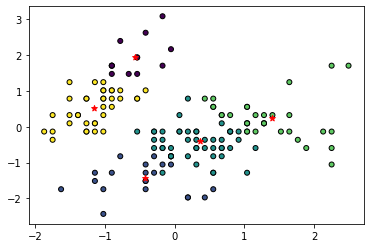

In [17]:

plt.scatter(x.iloc[:,0], x.iloc[:,1], marker = "o", c = kmeans.labels_, s = 25, edgecolor = "k")
# x.iloc[:,0] selects our first feature (sepal.length)
# x.iloc[:,1] selects our second featuee (sepal.width)
# c - determines the marker colours: takes a sequence of n numbers to be mapped to colours
# marker - marker style, whether it's a circle, triangle, square etc
# edgecolor - the edge colour of the marker

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red', marker = '*')
# here we're accessing the kmeans attribute 'cluster_centers' and getting coordinates for the first and second feature


plt.show()

# Elbow Method - let's find the optimal number of clusters

## A brief recap!

Determining the number of clusters is a crucial step in the k-means algorithm. You'll notice that each time you increment the number of clusters, the inertia value (the lowest SSE value found during the k-means runs) decreases. That's a good thing right? Not entirely, as at some point this becomes 'over-fitting', which describes a statistical model that fits exactly against its training data. When this happens our model becomes ineffective, as it cannot be used to effectively predict the classes of unseen data. 

As more centroids are added, the distance from each point to its closest centroid will decrease. So, how do we know when to stop adding centroids? How can we avoid 'over-fitting'?

A common method used to evaluate the appropriate number of clusters is the 'elbow method'. This involves running k-means clustering on the dataset for a range of values for k (e.g. 1-10). Then, we compute the SSE values for each k. The elbow method reveals a 'sweet spot' where the SSE curve starts to bend, i.e, its elbow point. This is the point at which diminishing returns are no longer worth the additional cost, i.e., choose the number of clusters so that adding another one doesn't produce a significantly better modelling of the data. 

In [18]:
# Create a dictionary of keyword arguments

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 32}



# Here we create a variable 'sse' which contains an empty list

sse = []

# We then iterate through each k value, ranging from 1-10
# Note: range() method does not include the end number in the result, that's why we do 1-11
for k in range(2, 11):
    
#     For each k, we instantiate the kmeans class 
# Here, the double asterix operator **  is used to unpack a dictionary of keyword arguments, kwargs
# We use it to unpack kmeans_kwargs, which have passed to the KMeans function
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    print(kmeans)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
# Let's take a look at our SSE scores
print("")
print(sse)

KMeans(init='random', n_clusters=2, random_state=32)
KMeans(init='random', n_clusters=3, random_state=32)
KMeans(init='random', n_clusters=4, random_state=32)
KMeans(init='random', n_clusters=5, random_state=32)
KMeans(init='random', n_clusters=6, random_state=32)
KMeans(init='random', n_clusters=7, random_state=32)
KMeans(init='random', random_state=32)
KMeans(init='random', n_clusters=9, random_state=32)
KMeans(init='random', n_clusters=10, random_state=32)

[222.36170496502294, 139.82049635974968, 114.41256181896091, 91.55536235350218, 81.76351037292379, 72.16740772304377, 63.87425654098381, 55.718735499442175, 51.1575889981783]


Just from looking at these numbers we can see that after 114.412.. we notice that the inertia starts decreasing in a more linear fashion. This indicates that k=3 will be the optimum number. But plotting this makes this more obvious, as we can observe the bend, so let's go ahead and do that!

# Visualisation for Elbow Method

We want to pick the value of k at the "elbow" i.e., the point after which the inertia starts decreasing in a linear fashion. In order to observe the elbow, we can plot the number of clusters and the corresponding sse values. In the graph below, it's rather subtle, but we can see that the elbow point is at k=3. In which case, we can determine that the appropriate number of clusters for this dataset, is 3.

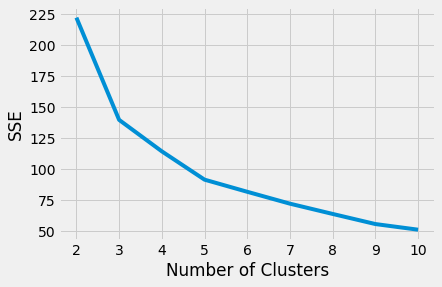

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

However, if the graph isn't all that clear, and you'd like a more straightforward means of acquiring the elbow point, you can use the 'kneed' Python package. This comes with the KneeLocator() class, which determines the elbow point programmatically. Let's see if it matches our observation that k should = 3.

In [26]:

kl = KneeLocator(
    range(2, 11), sse, curve="convex", direction="decreasing")


# We can now access the 'elbow' variable
kl.elbow

5

In [21]:
# Distribution plots - histograms

# sns.FacetGrid(iris,hue="variety",size=3).map(sns.distplot,"petal.length").add_legend()
# sns.FacetGrid(iris,hue="variety",size=3).map(sns.distplot,"petal.width").add_legend()
# sns.FacetGrid(iris,hue="variety",size=3).map(sns.distplot,"sepal.length").add_legend()
# sns.FacetGrid(iris,hue="variety",size=3).map(sns.distplot,"sepal.width").add_legend()
# plt.show()